# Trying out some other models on car counts time series (on clear days only)

In [2]:
# Import the `pandas` library as `pd`
import pandas as pd
# Import the `numpy` library as `np`
import numpy as np
# pylab for matplotlib
%pylab inline
# load time series modules
from pandas import Series, DataFrame
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

Populating the interactive namespace from numpy and matplotlib
scipy: 0.19.1
sklearn: 0.19.0


In [3]:
# Load in the data with `read_csv()`
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv("data.csv", parse_dates=['date'], index_col='date', date_parser=dateparse)
# setting up cloud & day columns as a categorical variable
df['cloud.indicator'] = df['cloud.indicator'].astype('category')
df['day.of.week'] = df['day.of.week'].astype('category')
# only looking at clear days
df_clear = df[df['cloud.indicator'][:] == 'clear'] # clear days

In [4]:
# Setting up car count series
ts_car = Series(df_clear['car.count'], index = df_clear.index)
ts_car

date
2010-01-01    101
2010-01-03    113
2010-01-05    124
2010-01-06    104
2010-01-07     81
2010-01-10    132
2010-01-11    105
2010-01-12     94
2010-01-13     99
2010-01-15     98
2010-01-18     96
2010-01-19     94
2010-01-20     91
2010-01-22    101
2010-01-23    123
2010-01-24    123
2010-01-25    107
2010-01-26     93
2010-01-27    118
2010-01-29     91
2010-01-30    124
2010-01-31    105
2010-02-02     90
2010-02-03     84
2010-02-06    103
2010-02-08     98
2010-02-15     97
2010-02-16    107
2010-02-18    119
2010-02-19     93
             ... 
2016-05-13    142
2016-05-14    109
2016-05-15    142
2016-05-17    108
2016-05-19    103
2016-05-21    114
2016-05-22    103
2016-05-24     92
2016-05-25    109
2016-05-28    129
2016-05-29    120
2016-06-02    109
2016-06-03    107
2016-06-04    112
2016-06-05    123
2016-06-06    154
2016-06-07    135
2016-06-08    107
2016-06-09    125
2016-06-10    111
2016-06-12    141
2016-06-13    119
2016-06-16     95
2016-06-20    119
2016-

In [ ]:
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Computing summary statistics of time series
--------------------------------------------------

In [4]:
# function to compute mean of time series and standard deviation
def compute_mean_std(ts):

    # compute rolling statistics (mean and STD)
    rolmean = pd.rolling_mean(ts, window=12)
    rol_std = pd.rolling_std(ts, window=12)
    
    # Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Mean')
    std = plt.plot(rol_std, color='green', label = 'Std')
    plt.legend(loc='best')
    plt.title('Mean & standard deviation (Std)')
    plt.show(block=False)
    
# function to compute median statistics of time series and median absolute deviation (mad)
def compute_mad(ts):

    # compute rolling statistics (median and MAD)
    rolmedian = pd.rolling_median(ts, window=12)
    ts_med_diff = abs(ts - rolmedian)
    rol_mad = pd.rolling_median(ts_med_diff, window=12)
    
    # Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    median = plt.plot(rolmedian, color='red', label='Median')
    mad = plt.plot(rol_mad, color='green', label = 'MAD')
    plt.legend(loc='best')
    plt.title('Median & Median absolute deviation (MAD)')
    plt.show(block=False)
    
# function to plot Mean, median, STD, MAD
def compute_std_mad(ts):
    
    # compute rolling statistics (median and deviation about the median)
    rolmean = pd.rolling_mean(ts, window=30)
    rol_std = pd.rolling_std(ts, window=30)
    rolmedian = pd.rolling_median(ts, window=30)
    ts_med_diff = abs(ts - rolmedian)
    rol_mad = pd.rolling_median(ts_med_diff, window=30)

    # Plot rolling statistics:
    mean = plt.plot(rolmean, color='blue', label='Mean')
    median = plt.plot(rolmedian, color='red', label='Median')
    std = plt.plot(rol_std, color='green', label = 'STD')
    mad = plt.plot(rol_mad, color='maroon', label = 'MAD')
    plt.legend(loc='best')
    plt.title('Mean, median, STD, MAD')
    plt.show(block=False)

/home/prasanna/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/prasanna/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


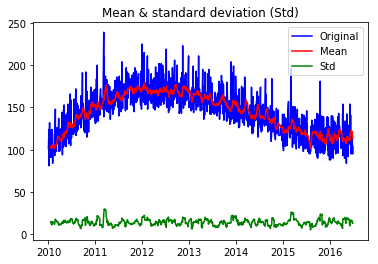

/home/prasanna/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).median()
/home/prasanna/.local/lib/python2.7/site-packages/ipykernel_launcher.py:22: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).median()


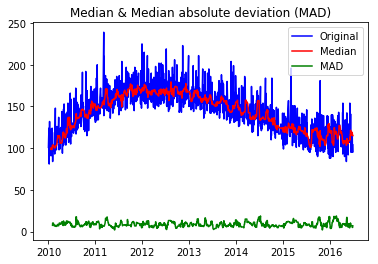

In [5]:
compute_mean_std(ts_car)
compute_mad(ts_car)

/home/prasanna/.local/lib/python2.7/site-packages/ipykernel_launcher.py:36: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/home/prasanna/.local/lib/python2.7/site-packages/ipykernel_launcher.py:37: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
/home/prasanna/.local/lib/python2.7/site-packages/ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).median()
/home/prasanna/.local/lib/python2.7/site-packages/ipykernel_launcher.py:40: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).median()


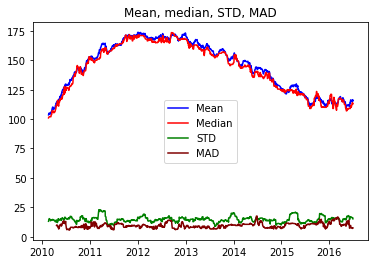

In [6]:
compute_std_mad(ts_car)

Test stationarity
--------------------

/home/prasanna/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).median()
  after removing the cwd from sys.path.


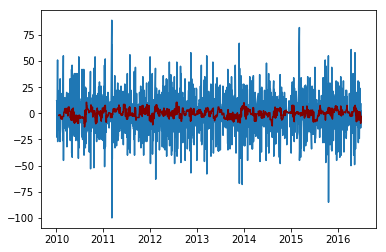

In [7]:
# testing stationarity of the car count time series
ts_car_diff = ts_car - ts_car.shift()
ts_car_diff.dropna(inplace=True)
median_ts_car_diff = pd.rolling_median(ts_car_diff, window=12)
plt.plot(ts_car_diff)
plt.plot(median_ts_car_diff, 'maroon')


In [8]:
# function to test stationarity: Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print('statsmodels: %s' % statsmodels.__version__)
def test_stationarity(ts):
        
    print 'Dickey-Fuller test (Choosing automatic lag using AIC):'
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
test_stationarity(ts_car_diff)

Dickey-Fuller test (Choosing automatic lag using AIC):
Test Statistic                -1.090358e+01
p-value                        1.142956e-19
Lags Used                      2.400000e+01
Number of observations Used    1.327000e+03
Critical Value (5%)           -2.863720e+00
Critical Value (1%)           -3.435287e+00
Critical Value (10%)          -2.567931e+00
dtype: float64


/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Seasonality / Trend
----------------------

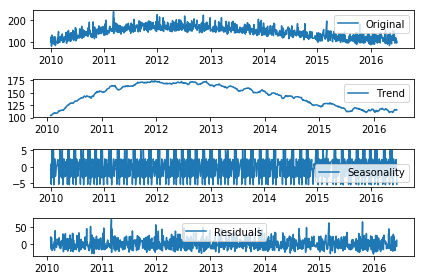

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_car,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_car, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [18]:
ts_car_decompose = residual
ts_car_decompose.dropna(inplace=True)
test_stationarity(ts_car_decompose)

Dickey-Fuller test (Choosing automatic lag using AIC):
Test Statistic                -1.191726e+01
p-value                        5.129863e-22
Lags Used                      2.300000e+01
Number of observations Used    1.299000e+03
Critical Value (5%)           -2.863768e+00
Critical Value (1%)           -3.435394e+00
Critical Value (10%)          -2.567956e+00
dtype: float64


Time series forecasting
---------------------------

In [19]:
# Time series forecasting: ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_car_decompose, nlags=20)
lag_pacf = pacf(ts_car_decompose, nlags=20, method='ols')
lag_acf

array([ 1.        , -0.04253811, -0.08095106, -0.00785451, -0.03389473,
       -0.00628896, -0.01257765, -0.06440005, -0.0851503 , -0.04715836,
        0.02157346, -0.06125157, -0.0602697 , -0.02397765, -0.03556986,
       -0.00280221,  0.01060556,  0.01783638,  0.01577172, -0.01446382,
        0.0055934 ])

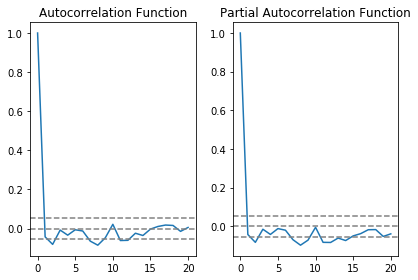

In [20]:
# ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_car_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_car_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
# PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_car_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_car_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [27]:
from statsmodels.tsa.arima_model import ARMA

const             -0.017539
ar.L1.car.count   -0.042590
dtype: float64


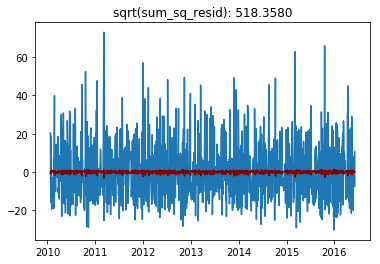

In [30]:
# Trying out ARMA(1,0)
model = ARMA(ts_car_decompose, order=(1, 0)).fit()  
print(model.params)
plt.plot(ts_car_decompose)
plt.plot(model.fittedvalues, color='maroon')
plt.title('sqrt(sum_sq_resid): %.4f'% sqrt(sum((model.fittedvalues-ts_car_decompose)**2)))

const              0.005672
ma.L1.car.count   -0.936284
dtype: float64


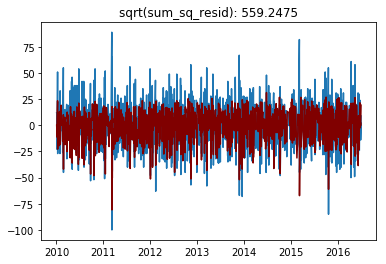

In [31]:
# Trying out ARMA(0,1)
model = ARMA(ts_car_diff, order=(0, 1)).fit()  
print(model.params)
plt.plot(ts_car_diff)
plt.plot(model.fittedvalues, color='maroon')
plt.title('sqrt(sum_sq_resid): %.4f'% sqrt(sum((model.fittedvalues-ts_car_diff)**2)))

const              0.005675
ar.L1.car.count   -0.001726
ma.L1.car.count   -0.936108
dtype: float64


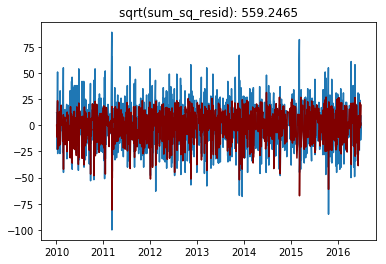

In [32]:
# Trying out ARMA(1,1)
model = ARMA(ts_car_diff, order=(1, 1)).fit()  
print(model.params)
plt.plot(ts_car_diff)
plt.plot(model.fittedvalues, color='maroon')
plt.title('sqrt(sum_sq_resid): %.4f'% sqrt(sum((model.fittedvalues-ts_car_diff)**2)))

Other extensions
-------------------